In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [6]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

In [7]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:

Let's do some plotting to know how the data columns are distributed in the dataset¶



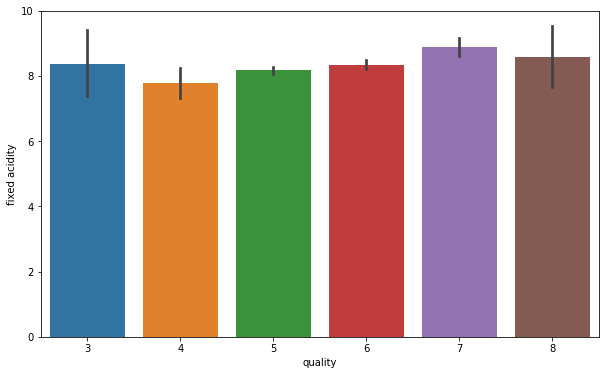

In [9]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

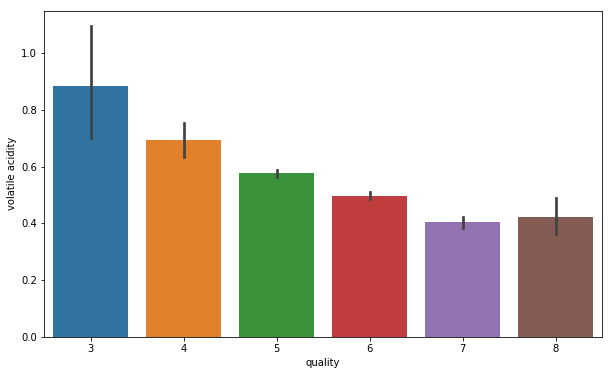

In [10]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

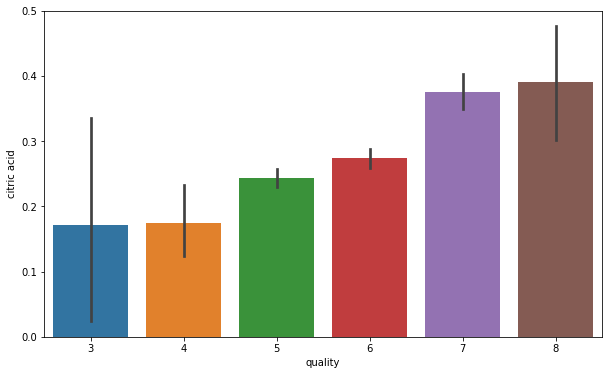

In [11]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

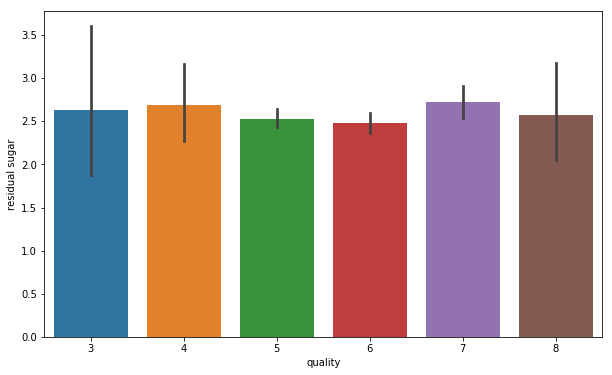

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

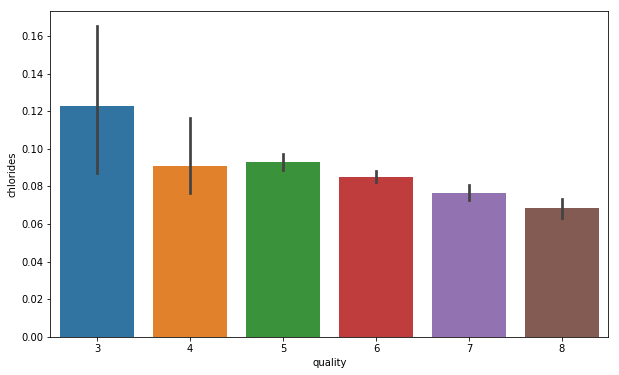

In [13]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

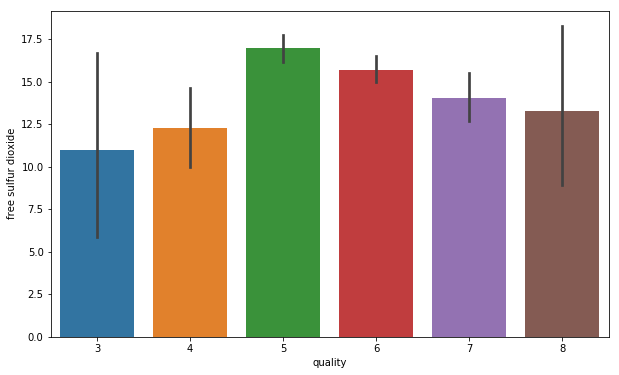

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

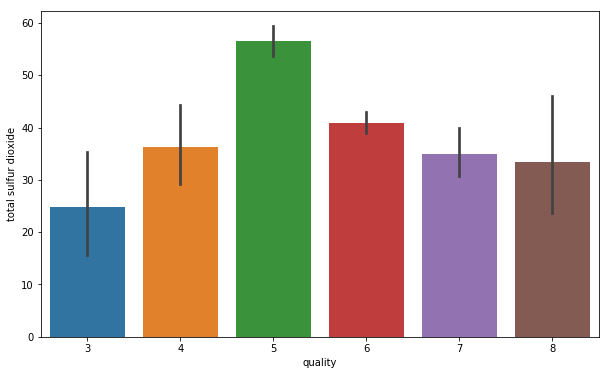

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

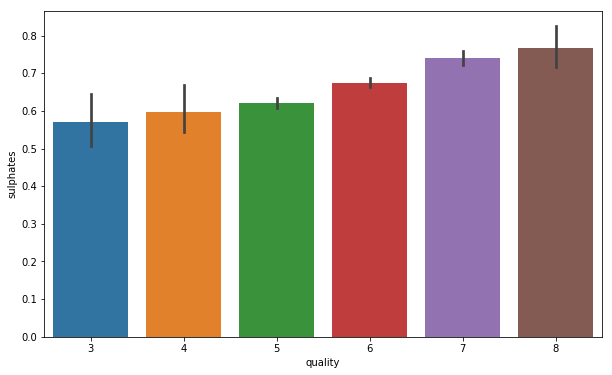

In [16]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

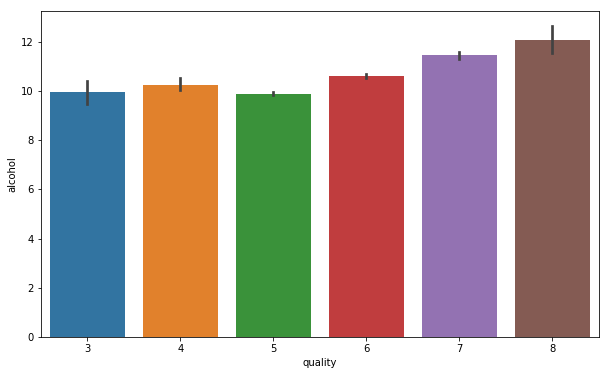

In [17]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [ ]:
Preprocessing Data for performing Machine learning algorithms

In [18]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [19]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [22]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [23]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

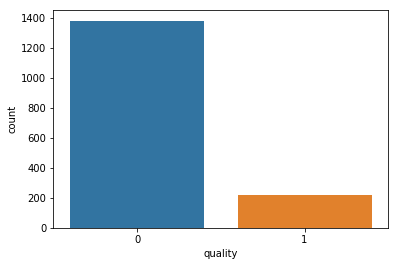

In [24]:
sns.countplot(wine['quality'])

In [25]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [26]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
Our training and testing data is ready now to perform machine learning algorithm 

In [ ]:
Random Forest Classifier¶

In [29]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [30]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93       273
          1       0.63      0.40      0.49        47

avg / total       0.86      0.88      0.87       320



In [ ]:
Random forest gives the accuracy of 86%¶

In [31]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[262  11]
 [ 28  19]]


In [ ]:
Stochastic Gradient Decent Classifier¶

In [62]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\New folder\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [63]:
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.92      0.88      0.90       273
          1       0.44      0.53      0.48        47

avg / total       0.85      0.83      0.84       320



In [ ]:
85% accuracy using stochastic gradient descent classifier

In [40]:
print(confusion_matrix(y_test, pred_sgd))

[[266   7]
 [ 41   6]]


In [ ]:
Support Vector Classifier¶

In [41]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [42]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



In [ ]:
Support vector classifier gets 86%

In [ ]:
Grid Search CV¶

In [43]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [51]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [53]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       273
          1       0.89      0.34      0.49        47

avg / total       0.90      0.90      0.88       320



In [ ]:
SVC improves from 86% to 90% using Grid Search CV  

In [ ]:
Cross Validation Score for random forest and SGD¶

In [54]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.91009473425196852

In [ ]:

Random forest accuracy increases from 87% to 91 % using cross validation score